In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [25]:
x=pd.read_csv(r"C:\Users\khiza\Downloads\amazon_sales_data 2025.csv")
x

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [26]:
x.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [27]:
x.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

## total revenue genarated by company

In [28]:
x['Total Sales'].sum()

np.int64(243845)

## highest sales in product categroy

In [29]:
x.sort_values(by='Total Sales',ascending=False).head(1)

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
92,ORD0093,06-03-25,Refrigerator,Home Appliances,1200,5,6000,David Lee,Denver,PayPal,Cancelled


## top 10 best selling products

In [30]:
x.sort_values(by='Quantity',ascending=False).head(10)

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
24,ORD0025,02-03-25,Book,Books,15,5,75,Sophia Miller,Seattle,Amazon Pay,Completed
33,ORD0034,02-04-25,T-Shirt,Clothing,20,5,100,Jane Smith,New York,Credit Card,Pending
47,ORD0048,11-02-25,T-Shirt,Clothing,20,5,100,Jane Smith,Denver,Amazon Pay,Completed
85,ORD0086,25-02-25,Smartwatch,Electronics,150,5,750,Jane Smith,Dallas,PayPal,Cancelled
119,ORD0120,16-02-25,Laptop,Electronics,800,5,4000,Emily Johnson,Denver,PayPal,Completed
112,ORD0113,19-03-25,Book,Books,15,5,75,David Lee,San Francisco,Debit Card,Pending
117,ORD0118,10-02-25,Headphones,Electronics,100,5,500,John Doe,Houston,Amazon Pay,Completed
103,ORD0104,22-02-25,Jeans,Clothing,40,5,200,Jane Smith,Dallas,Debit Card,Pending
108,ORD0109,17-03-25,Jeans,Clothing,40,5,200,Michael Brown,New York,PayPal,Completed
109,ORD0110,18-02-25,Smartphone,Electronics,500,5,2500,Olivia Wilson,Dallas,Amazon Pay,Pending


## most sales revenue city

In [31]:
x.groupby('Customer Location')[['Total Sales']].sum().sort_values(by='Total Sales', ascending=False).head().reset_index()

,Customer Location,Total Sales
0,Miami,31700
1,Denver,29785
2,Houston,28390
3,Dallas,27145
4,Seattle,26890


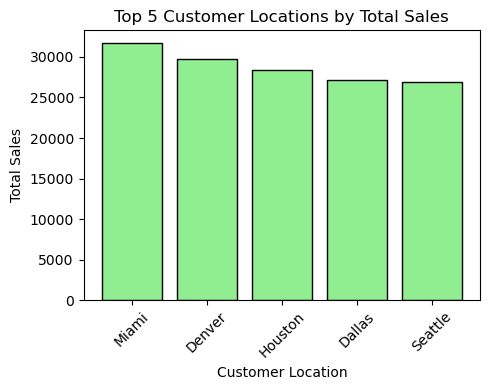

In [32]:
import matplotlib.pyplot as plt

x_hist = (x.groupby('Customer Location')[['Total Sales']].sum().sort_values(by='Total Sales', ascending=False).head().reset_index())
plt.figure(figsize=(5, 4))
plt.bar(x_hist['Customer Location'], x_hist['Total Sales'], color='lightgreen', edgecolor='black')
plt.title('Top 5 Customer Locations by Total Sales')
plt.xlabel('Customer Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## average order value

In [33]:
a = x['Total Sales'].sum() / x['Order ID'].nunique()
a

np.float64(975.38)

##  unique customers placed orders

In [34]:
x['Customer Name'].value_counts()

Customer Name
Emma Clark       32
Jane Smith       30
Olivia Wilson    29
David Lee        26
John Doe         26
Michael Brown    24
Daniel Harris    23
Emily Johnson    22
Chris White      22
Sophia Miller    16
Name: count, dtype: int64

In [35]:
 x['Customer Name'].nunique()

10

## most products purchased by customer

In [36]:
x.groupby('Customer Name')[['Total Sales']].sum().sort_values(by='Total Sales',ascending=False).head().reset_index()

,Customer Name,Total Sales
0,Olivia Wilson,36170
1,Jane Smith,31185
2,Emma Clark,29700
3,John Doe,26870
4,Emily Johnson,23475


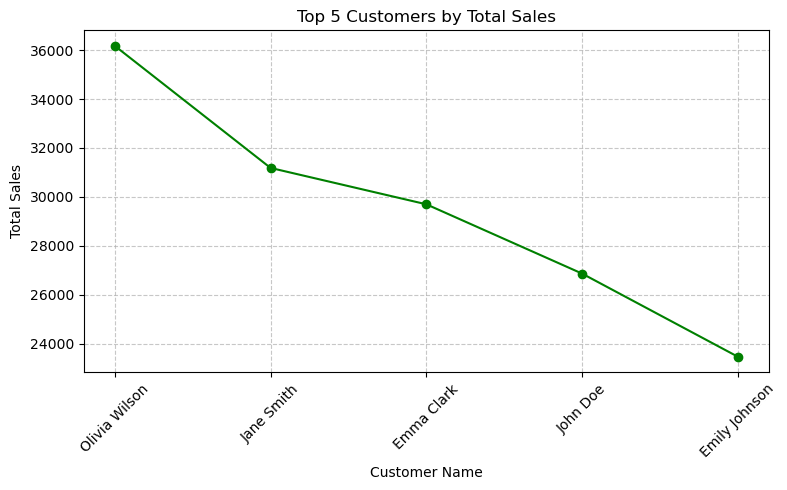

In [38]:
import matplotlib.pyplot as plt
x_line = (x.groupby('Customer Name')[['Total Sales']].sum().sort_values(by='Total Sales', ascending=False).head().reset_index())
plt.figure(figsize=(8, 5))
plt.plot(x_line['Customer Name'], x_line['Total Sales'], marker='o', linestyle='-', color='green')
plt.title('Top 5 Customers by Total Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [104]:
 x.groupby('Customer Name')[['Total Sales']].sum().reset_index()

,Customer Name,Total Sales
0,Chris White,18885
1,Daniel Harris,18945
2,David Lee,22665
3,Emily Johnson,23475
4,Emma Clark,29700
5,Jane Smith,31185
6,John Doe,26870
7,Michael Brown,22655
8,Olivia Wilson,36170
9,Sophia Miller,13295


## payment methods most frequently used by customers

In [83]:
x.sort_values(by='Payment Method',ascending=False).head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
65,ORD0066,14-03-25,Smartwatch,Electronics,150,2,300,Michael Brown,Denver,PayPal,Pending
162,ORD0163,20-02-25,Running Shoes,Footwear,60,2,120,Chris White,Houston,PayPal,Completed
85,ORD0086,25-02-25,Smartwatch,Electronics,150,5,750,Jane Smith,Dallas,PayPal,Cancelled
84,ORD0085,06-02-25,Smartphone,Electronics,500,5,2500,Michael Brown,Houston,PayPal,Completed
83,ORD0084,14-02-25,T-Shirt,Clothing,20,5,100,Olivia Wilson,Boston,PayPal,Completed


In [84]:
x['Payment Method'].value_counts()


Payment Method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64

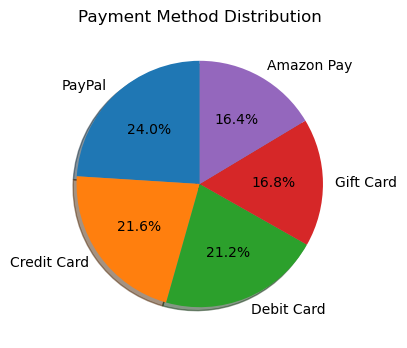

In [85]:
import matplotlib.pyplot as plt
payment_counts = x['Payment Method'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(payment_counts,labels=payment_counts.index,autopct='%1.1f%%',startangle=90,shadow=True)

plt.title('Payment Method Distribution')
plt.show()


## analyze of profit margin by product 

In [86]:
x.sort_values(by='Total Sales' ,ascending=False).head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
92,ORD0093,06-03-25,Refrigerator,Home Appliances,1200,5,6000,David Lee,Denver,PayPal,Cancelled
125,ORD0126,04-02-25,Refrigerator,Home Appliances,1200,5,6000,Olivia Wilson,Chicago,Gift Card,Pending
68,ORD0069,25-02-25,Refrigerator,Home Appliances,1200,4,4800,David Lee,Boston,Gift Card,Pending
73,ORD0074,25-03-25,Refrigerator,Home Appliances,1200,4,4800,Jane Smith,Dallas,Gift Card,Cancelled
63,ORD0064,13-02-25,Refrigerator,Home Appliances,1200,4,4800,Emily Johnson,Denver,PayPal,Pending


In [87]:
x = x.groupby('Category')[['Total Sales']].sum().reset_index()
x = x.sort_values(by='Total Sales', ascending=False)
x


,Category,Total Sales
2,Electronics,129950
4,Home Appliances,105000
3,Footwear,4320
1,Clothing,3540
0,Books,1035


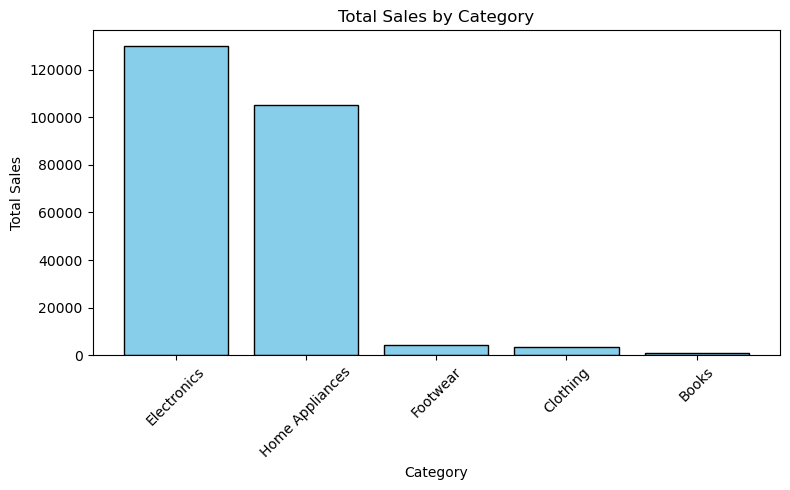

In [39]:
import matplotlib.pyplot as plt
x = x.groupby('Category')[['Total Sales']].sum().reset_index()
x = x.sort_values(by='Total Sales', ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(x['Category'], x['Total Sales'], color='skyblue', edgecolor='black')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

